In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hebamosad","key":"7156b65198d034d307cc81c69a3abfea"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 734M/745M [00:06<00:00, 112MB/s] 
100% 745M/745M [00:06<00:00, 115MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras ,os
from keras.models import *
from keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install split-folders
import splitfolders as sf


In [ ]:
input_folder = "/content/dataset"
output = "/content/splited"


In [ ]:
output

'/content/splited'

In [ ]:
sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .0,.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.29 files/s]
Copying files: 400 files [00:00, 1720.24 files/s]
Copying files: 832 files [00:00, 2708.38 files/s]
Copying files: 1247 files [00:00, 3215.48 files/s]
Copying files: 1622 files [00:00, 3393.23 files/s]
Copying files: 1988 files [00:00, 3414.08 files/s]
Copying files: 2410 files [00:00, 3663.66 files/s]
Copying files: 2834 files [00:00, 3841.07 files/s]
Copying files: 3228 files [00:01, 3429.90 files/s]
Copying files: 3586 files [00:01, 3097.00 files/s]
Copying files: 3910 files [00:01, 2849.55 files/s]
Copying files: 4232 files [00:01, 2942.82 files/s]
Copying files: 4537 files [00:01, 2883.95 files/s]
Copying files: 4832 files [00:01, 2883.27 files/s]
Copying files: 5237 files [00:01, 3205.71 files/s]
Copying files: 5635 files [00:01, 3424.35 files/s]
Copying files: 6038 files [00:01, 3596.47 files/s]
Copying files: 6444 files [00:02, 3731.38 files/s]
Copying files: 6821 files [00:02, 3039.84 file

In [ ]:
train_dir='/content/output/train'
val_ds='/content/output/val'
test_set='/content/output/test'

In [ ]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(224, 224),
                                  
    batch_size=32
)

Found 11045 files belonging to 2 classes.
Using 8836 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

Found 11045 files belonging to 2 classes.
Using 2209 files for validation.


In [ ]:
AlexNet = Sequential()
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 256)       0

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=.0001)
AlexNet.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = AlexNet.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds
)

Epoch 1/15
277/277 [==============================] - 42s 147ms/step - loss: 0.3135 - accuracy: 0.9215 - val_loss: 1.0677 - val_accuracy: 0.6157
Epoch 2/15
277/277 [==============================] - 41s 146ms/step - loss: 0.2582 - accuracy: 0.9550 - val_loss: 0.4095 - val_accuracy: 0.8669
Epoch 3/15
277/277 [==============================] - 41s 147ms/step - loss: 0.2328 - accuracy: 0.9641 - val_loss: 0.6696 - val_accuracy: 0.6790
Epoch 4/15
277/277 [==============================] - 41s 147ms/step - loss: 0.2093 - accuracy: 0.9734 - val_loss: 0.4435 - val_accuracy: 0.8511
Epoch 5/15
277/277 [==============================] - 41s 147ms/step - loss: 0.1920 - accuracy: 0.9780 - val_loss: 0.8537 - val_accuracy: 0.6274
Epoch 6/15
277/277 [==============================] - 41s 147ms/step - loss: 0.1773 - accuracy: 0.9819 - val_loss: 0.4836 - val_accuracy: 0.8026
Epoch 7/15
277/277 [==============================] - 41s 147ms/step - loss: 0.1660 - accuracy: 0.9849 - val_loss: 0.5644 - val_ac

Text(0.5, 0, 'epoch')

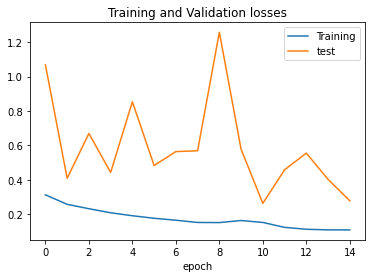

In [ ]:
 history.history.keys() 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'test'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

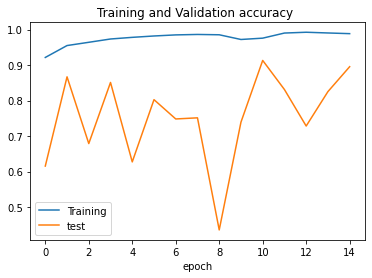

In [ ]:
history.history.keys() 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'test'])
plt.title('Training and Validation accuracy ')
plt.xlabel('epoch')

In [ ]:
import cv2
image =cv2.imread("/content/output/train/COVID/COVID-1004.png")
# size_img=cv2.resize(image,(224,224))

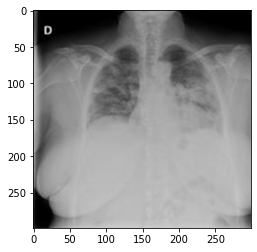

In [ ]:
plt.imshow(image)
plt.show()

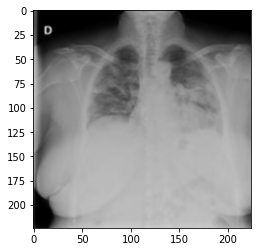

In [ ]:
from skimage.transform import resize
resize_img=resize(image,(224,224,3))
img =plt.imshow(resize_img)

In [ ]:
prediction =AlexNet.predict(np.array([resize_img]))
prediction

array([[0.8536764 , 0.14632359]], dtype=float32)

In [ ]:
import math 
covid =AlexNet.predict(np.array([resize_img]))[0][0]*100
non_covid =AlexNet.predict(np.array([resize_img]))[0][1]*100
print(covid)
print(non_covid)

85.36763787269592
14.632359147071838


In [ ]:
if (covid>non_covid):
  print("there's",math.floor(covid),"% chance it covid")
elif(non_covid>covid):
   print("there's",math.floor(non_covid),"% chance it is non_covid")

there's 85 % chance it covid
